Question 1: Binary Classification with Logistic Regression<br>

Description:<br>
Use logistic regression to classify the famous Iris dataset into two classes: Versicolor and Not-Versicolor.

In [91]:
# Write your code from here

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification: Versicolor (1) vs Not-Versicolor (0)
# In the dataset: 0 = Setosa, 1 = Versicolor, 2 = Virginica
y_binary = (y == 1).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not-Versicolor", "Versicolor"]))


Accuracy: 0.7333333333333333

Classification Report:
                 precision    recall  f1-score   support

Not-Versicolor       0.76      0.91      0.83        32
    Versicolor       0.57      0.31      0.40        13

      accuracy                           0.73        45
     macro avg       0.67      0.61      0.61        45
  weighted avg       0.71      0.73      0.70        45



Question 2: Multi-Class Classification with Decision Trees<br>

Description:<br>
Classify the Iris dataset using a Decision Tree classifier and visualize the decision tree.

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



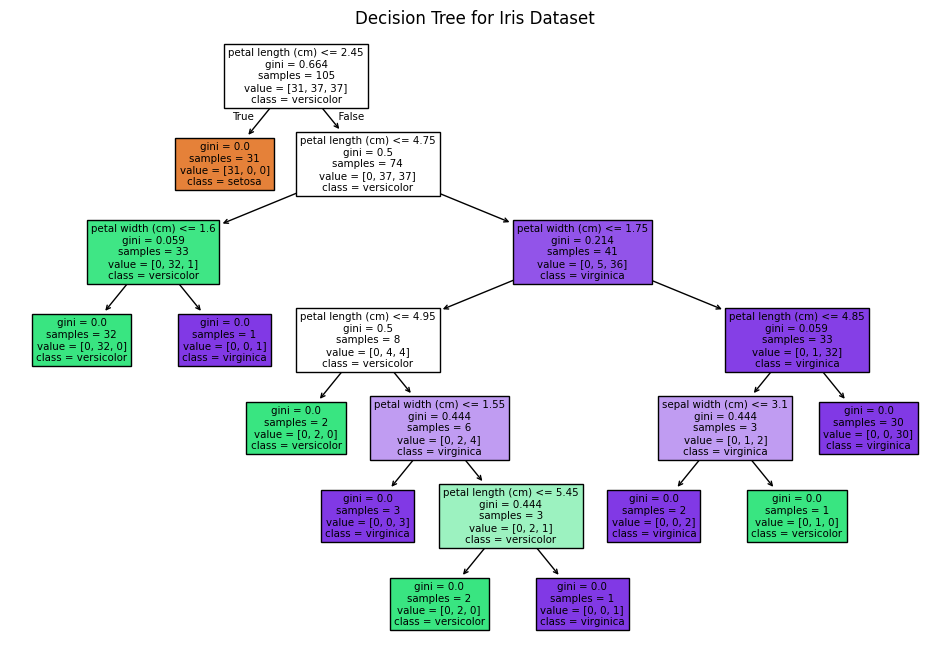

In [92]:
# Write your code from here

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset")
plt.show()


Question 3: K-Nearest Neighbors for Binary Classification<br>

Description:<br>
Use K-Nearest Neighbors to classify the Breast Cancer dataset into two classes: Malignant and Benign.

In [93]:
# Write your code from here

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = Malignant, 1 = Benign

# Standardize the feature data (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



Accuracy: 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Question 4: Evaluate Classification Model using Confusion Matrix<br>

Description:<br>
Evaluate the performance of the K-Nearest Neighbors classifier from Question 3 using a
confusion matrix.

Accuracy: 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



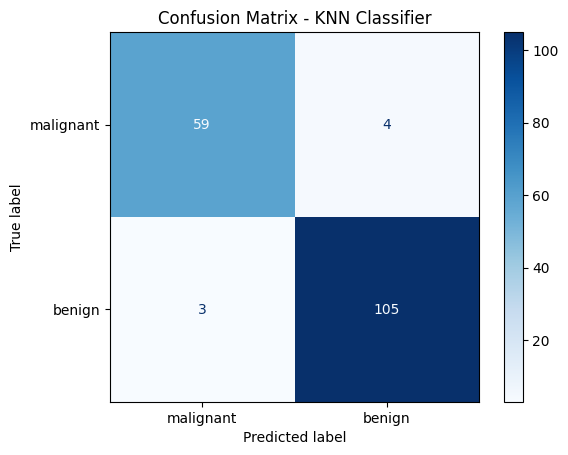

In [94]:
# Write your code from here

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = Malignant, 1 = Benign

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate with accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN Classifier")
plt.show()


Question 5: SVM Classifier for Multi-Class Classification<br>

Description:<br>
Classify the Wine dataset using Support Vector Machine and check the model's performance.

In [95]:
# Write your code from here

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target  # 3 classes: 0, 1, 2

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train an SVM classifier (default kernel is RBF)
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Accuracy: 0.9814814814814815

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Question 6: Precision, Recall, and F1-Score<br>

Description:<br>
Calculate precision, recall, and F1-score for the SVM model trained on the Wine dataset.

In [96]:
# Write your code from here

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target  # 3 classes

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted):    {recall:.4f}")
print(f"F1-Score (weighted):  {f1:.4f}")

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Precision (weighted): 0.9823
Recall (weighted):    0.9815
F1-Score (weighted):  0.9814

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Question 7: Random Forest for Binary Classification with Feature Importance<br>

Description:<br>
Train a Random Forest classifier on the Breast Cancer dataset and display feature
importances.

Accuracy: 0.9707602339181286

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



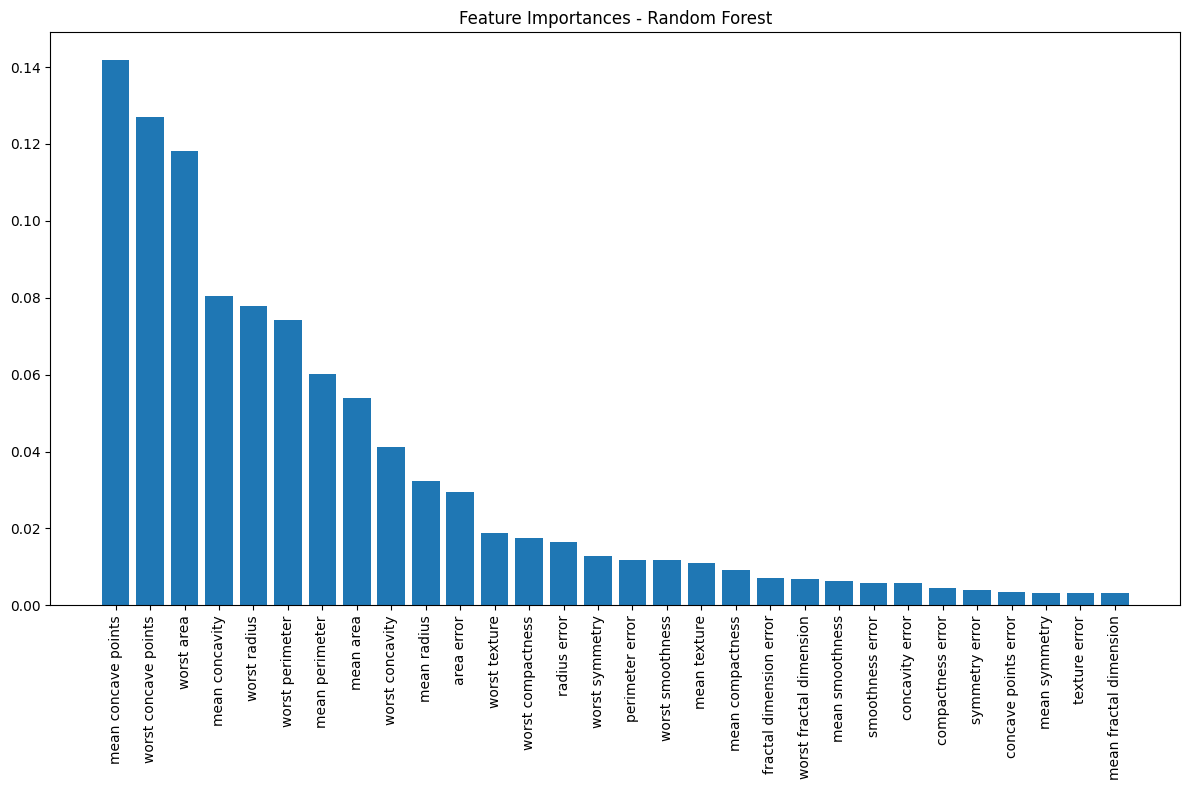

In [97]:
# Write your code from here

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = Malignant, 1 = Benign

# Standardize the features (optional but can help in general)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = data.feature_names

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Question 8: ROC-AUC Curve for Binary Classification<br>

Description:<br>
Plot the ROC-AUC curve for the Random Forest model on the Breast Cancer dataset.

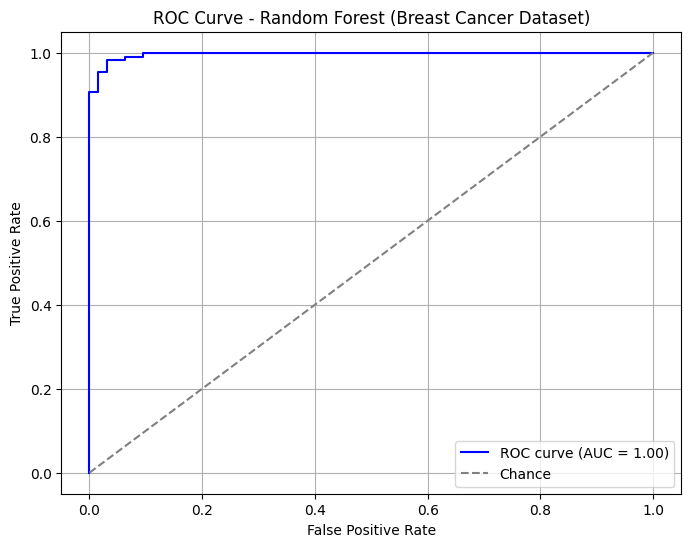

In [98]:
# Write your code from here

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = Malignant, 1 = Benign

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Breast Cancer Dataset)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Question 9: Hyperparameter Tuning with Grid Search for SVM Classifier<br>

Description:<br>
Perform hyperparameter tuning on the SVM classifier for the Wine dataset using GridSearchCV.

In [99]:
# Write your code from here

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM and perform Grid Search
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")

# Evaluate best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Accuracy: 0.9757

Test Set Accuracy: 0.9814814814814815

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Question 10: Ensemble Learning using Voting Classifier<br>

Description:<br>
Combine different classifiers to form a voting ensemble and classify the Iris dataset.

In [100]:
# Write your code from here

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize individual classifiers
clf1 = LogisticRegression(random_state=42, max_iter=200)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)  # probability=True needed for soft voting

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'  # soft voting uses predicted probabilities
)

# Train the ensemble
voting_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

